# SETUP
---

## import packages

In [192]:
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

print('--- packages imported ---')

--- packages imported ---


## load data

In [193]:
# load election results data
df_election = pd.read_csv('president_county_candidate.csv')
df_election.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [194]:
# load covid data
df_covid = pd.read_csv('covid_by_counties.csv')
df_covid.tail()

,date,county,state,fips,cases,deaths
729020,2020-11-13,Sweetwater,Wyoming,56037.0,991,4
729021,2020-11-13,Teton,Wyoming,56039.0,1108,2
729022,2020-11-13,Uinta,Wyoming,56041.0,686,4
729023,2020-11-13,Washakie,Wyoming,56043.0,205,7
729024,2020-11-13,Weston,Wyoming,56045.0,330,0


In [195]:
# load personal income data
df_income = pd.read_csv('personal_income_2018.csv')
df_income.head()

,GeoFips,GeoName,LineCode,Description,2018
0,01001,"Autauga, AL",1.0,Personal income (thousands of dollars),2314018
1,01001,"Autauga, AL",2.0,Population (persons) 1/,55601
2,01001,"Autauga, AL",3.0,Per capita personal income (dollars) 2/,41618
3,01003,"Baldwin, AL",1.0,Personal income (thousands of dollars),9940939
4,01003,"Baldwin, AL",2.0,Population (persons) 1/,218022


In [196]:
# load gdp (all industries) data
df_gdp = pd.read_csv('gdp_total_2018.csv')
df_gdp.head()

,GeoFips,GeoName,2018
0,01001,"Autauga, AL",1690937
1,01003,"Baldwin, AL",6606080
2,01005,"Barbour, AL",851956
3,01007,"Bibb, AL",424510
4,01009,"Blount, AL",942904


In [197]:
# load demographics data
df_demo = pd.read_csv('cc-est2019-alldata.csv', encoding='cp1252')
df_demo.tail()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
716371,50,56,45,Wyoming,Weston County,12,14,499,280,219,...,4,5,0,0,0,0,0,0,0,0
716372,50,56,45,Wyoming,Weston County,12,15,352,180,172,...,1,2,0,0,0,0,3,0,0,0
716373,50,56,45,Wyoming,Weston County,12,16,229,107,122,...,2,0,0,0,0,0,0,0,0,0
716374,50,56,45,Wyoming,Weston County,12,17,198,82,116,...,1,1,0,0,1,0,0,0,0,0
716375,50,56,45,Wyoming,Weston County,12,18,200,72,128,...,1,2,0,0,0,0,0,0,0,0


In [198]:
# load unemployment data
df_unemp = pd.read_csv('unemployment_2020_avg.csv')
df_unemp.head()

,LAUS Area Code,FIPS_state,FIPS_county,area title,period,civilian labor force,employed,unemployed_level,unemployed_rate
0,CN0100100000000,1.0,1.0,Autauga County AL,Aug-19,26079,25368,711,2.7
1,CN0100300000000,1.0,3.0,Baldwin County AL,Aug-19,97939,95367,2572,2.6
2,CN0100500000000,1.0,5.0,Barbour County AL,Aug-19,8652,8322,330,3.8
3,CN0100700000000,1.0,7.0,Bibb County AL,Aug-19,8670,8403,267,3.1
4,CN0100900000000,1.0,9.0,Blount County AL,Aug-19,25309,24641,668,2.6


## inspect data

### election data

In [199]:
for col in df_election.columns:
    print(col, df_election[col].nunique(), '\n', df_election[col].unique())

state 51 
 ['Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming' 'Alabama' 'Alaska' 'Arkansas'
 'California' 'Colorado' 'Connecticut' 'Arizona']
county 3007 
 ['Kent County' 'New Castle County' 'Sussex County' ... 'La Paz County'
 'Maricopa County' 'Mohave County']
candidate 38 
 ['Joe Biden' 'Donald Trump' 'Jo Jorgensen' 'Howie Hawkins' ' Write-ins'
 'Gloria La Riva' 'Brock Pierce' 'Rocky De La Fuente' 'Don Blankenship'
 'Kanye West' 'Brian Carroll' 'Ricki Sue King' 'Jade Simmons'
 'President Boddie' 'Bill Hammons' 'Tom Ho

### covid data

In [200]:
for col in df_covid.columns:
    print(col, df_covid[col].nunique(), '\n', df_covid[col].unique())

date 298 
 ['2020-01-21' '2020-01-22' '2020-01-23' '2020-01-24' '2020-01-25'
 '2020-01-26' '2020-01-27' '2020-01-28' '2020-01-29' '2020-01-30'
 '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03' '2020-02-04'
 '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08' '2020-02-09'
 '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13' '2020-02-14'
 '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18' '2020-02-19'
 '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23' '2020-02-24'
 '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28' '2020-02-29'
 '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04' '2020-03-05'
 '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09' '2020-03-10'
 '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15'
 '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20'
 '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25'
 '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30'
 '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04'

### personal income data

In [201]:
for col in df_income.columns:
    print(col, df_income[col].nunique(), '\n', df_income[col].unique())

GeoFips 3153 
 ['01001' '01003' '01005' ...
 'Note-- All dollar estimates are in thousands of current dollars (not adjusted for inflation). Calculations are performed on unrounded data.'
 '(NA) Not available.'
 'Last updated: November 14, 2019-- new statistics for 2018; revised statistics for 1969-2017.']
GeoName 3138 
 ['Autauga, AL' 'Baldwin, AL' 'Barbour, AL' ... 'Washakie, WY' 'Weston, WY'
 nan]
LineCode 3 
 [ 1.  2.  3. nan]
Description 3 
 ['Personal income (thousands of dollars)' 'Population (persons) 1/'
 'Per capita personal income (dollars) 2/' nan]
2018 9067 
 ['2314018' '55601' '41618' ... '6967' '44737' nan]


### gdp total data

In [202]:
for col in df_gdp.columns:
    print(col, df_gdp[col].nunique(), '\n', df_gdp[col].unique())

GeoFips 3126 
 ['01001' '01003' '01005' ...
 'Metropolitan Areas are defined (geographically delineated) by the Office of Management and Budget bulletin no. 18-04 issued September 14, 2018.'
 '(NA) Not available.'
 'Last updated: December 12, 2019 -- new statistics for 2001-2018.']
GeoName 3116 
 ['Autauga, AL' 'Baldwin, AL' 'Barbour, AL' ... 'Washakie, WY' 'Weston, WY'
 nan]
2018 3113 
 ['1690937' '6606080' '851956' ... '379984' '318545' nan]


### demographics data

In [203]:
for col in df_demo.columns:
    print(col, df_demo[col].nunique(), '\n', df_demo[col].unique())

SUMLEV 1 
 [50]
STATE 51 
 [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56]
COUNTY 324 
 [  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133  16  20  50  60  68
  70  90 100 110 122 130 150 158 164 170 180 185 188 195 198 220 230 240
 261 275 282 290  12 135 137 139 141 143 145 147 149  14  86 151 153 155
 157 159 161 163 165 167 169 171 173 175 177 179 181 183 187 189 191 193
 197 199 201 205 207 209 211 213 215 217 219 221 223 225 227 229 231 233
 235 237 239 241 243 245 247 249 251 253 255 257 259 263 265 267 269 271
 273 277 279 281 283 285 287 289 291 293 295 297 299 301 303 305 307 309
 311 313 315 317 319 321 203 510 186   6  28 102 323 325 327 329 331 333


HWAC_MALE 16072 
 [ 607   77   64 ... 9472 6283 7093]
HWAC_FEMALE 15861 
 [ 538   56   66 ... 7478 9051 6444]
HBAC_MALE 4146 
 [  57    9    2 ... 6005 6014 6104]
HBAC_FEMALE 4245 
 [  48    5    3 ... 6127 6147 6396]
HIAC_MALE 3281 
 [  26    4    2 ... 2946 2999 3018]
HIAC_FEMALE 3183 
 [  32    1    7 ... 2982 3036 3053]
HAAC_MALE 2188 
 [   9    0    2 ... 1365 1755 1837]
HAAC_FEMALE 2190 
 [  11    0    3 ... 1893  715  743]
HNAC_MALE 1207 
 [  19    2    1 ... 1180 1266  467]
HNAC_FEMALE 1193 
 [  10    1    0 ...  895 1118  369]


### unemployment data

In [204]:
for col in df_unemp.columns:
    print(col, df_unemp[col].nunique(), '\n', df_unemp[col].unique())

LAUS Area Code 3224 
 [' CN0100100000000' ' CN0100300000000' ' CN0100500000000' ...
 'Dash indicates that data are not available.' 'SOURCE: BLS LAUS'
 'October 28 2020']
FIPS_state 52 
 [ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 72. nan]
FIPS_county 325 
 [  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.  23.  25.  27.
  29.  31.  33.  35.  37.  39.  41.  43.  45.  47.  49.  51.  53.  55.
  57.  59.  61.  63.  65.  67.  69.  71.  73.  75.  77.  79.  81.  83.
  85.  87.  89.  91.  93.  95.  97.  99. 101. 103. 105. 107. 109. 111.
 113. 115. 117. 119. 121. 123. 125. 127. 129. 131. 133.  16.  20.  50.
  60.  68.  70.  90. 100. 110. 122. 130. 150. 158. 164. 170. 180. 185.
 188. 195. 198. 220. 230. 240. 261. 275. 282. 290.  12. 135. 137. 139.
 141. 143. 145. 147. 149.  14.  86. 151. 153. 155. 157. 159. 161. 163.
 165. 167. 1

# EDA
---

## election data

In [205]:
# election info
df_election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31139 entries, 0 to 31138
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        31139 non-null  object
 1   county       31139 non-null  object
 2   candidate    31139 non-null  object
 3   party        31139 non-null  object
 4   total_votes  31139 non-null  int64 
 5   won          31139 non-null  bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 1.2+ MB


### total votes by candidate

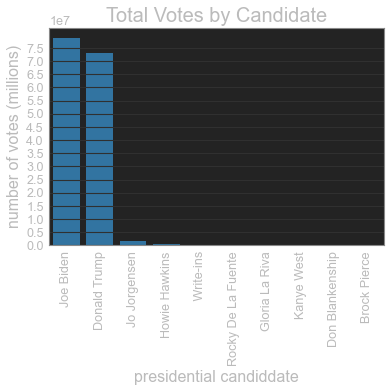

In [206]:
df_votes = df_election[['candidate','total_votes']].groupby('candidate').agg('sum').sort_values(by=['total_votes'], ascending=False).reset_index()
df_votes.columns = ['candidate','total_votes']

sns.barplot(data=df_votes.head(10),x='candidate',y='total_votes', color='tab:blue')
plt.title('Total Votes by Candidate', fontsize=20)
plt.xlabel('presidential candiddate', fontsize=16)
plt.ylabel('number of votes (millions)', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,80000000,5000000))

plt.show()

### group all 3rd party candidates into Other

In [207]:
def group_3rd_party(x):
    if x not in ['Joe Biden', 'Donald Trump']:
        return 'Other'
    return x
        
df_election.candidate = df_election.candidate.apply(group_3rd_party)
df_election.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Other,LIB,1044,False
3,Delaware,Kent County,Other,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


### pivot election data

In [208]:
# save off the county to state mapping
df_map = df_election[['state','county']].copy()
df_map = df_map.drop_duplicates().reset_index()
df_map.drop(['index'], axis=1, inplace=True)
df_map

# function to get the state
def get_state(x):
    return df_map[df_map.county == x].state.iloc[0]

In [209]:
# pivot election data on the candidate, grouped by county
df_pivot = df_election.copy()
df_pivot = df_pivot.pivot_table(index=['county','state'], columns='candidate', values='total_votes').reset_index()

# reorder columns
df_pivot.columns.to_list()
df_pivot = df_pivot[['county', 'state', 'Donald Trump', 'Joe Biden', 'Other']]
df_election = df_pivot.copy()
df_election

candidate,county,state,Donald Trump,Joe Biden,Other
0,Abbeville County,South Carolina,8215.0,4101.0,39.000000
1,Abbot,Maine,288.0,121.0,2.000000
2,Abington,Massachusetts,4188.0,5127.0,78.333333
3,Acadia Parish,Louisiana,22596.0,5443.0,35.090909
4,Accomack County,Virginia,9172.0,7578.0,188.000000
...,...,...,...,...,...
4628,Yuma County,Arizona,35766.0,31562.0,1099.000000
4629,Yuma County,Colorado,4037.0,763.0,4.473684
4630,Zapata County,Texas,2032.0,1820.0,7.500000
4631,Zavala County,Texas,1490.0,2864.0,12.500000


In [210]:
for col in df_election.columns:
    print(col, df_election[col].nunique(), '\n', df_election[col].unique())

county 3007 
 ['Abbeville County' 'Abbot' 'Abington' ... 'Zapata County' 'Zavala County'
 'Ziebach County']
state 51 
 ['South Carolina' 'Maine' 'Massachusetts' 'Louisiana' 'Virginia'
 'New Hampshire' 'Idaho' 'Iowa' 'Kentucky' 'Missouri' 'Oklahoma'
 'Colorado' 'Illinois' 'Indiana' 'Mississippi' 'Nebraska' 'North Dakota'
 'Ohio' 'Pennsylvania' 'Washington' 'Wisconsin' 'Vermont' 'Minnesota'
 'Florida' 'North Carolina' 'California' 'New York' 'Wyoming' 'Michigan'
 'Maryland' 'Kansas' 'Tennessee' 'Texas' 'Connecticut' 'Arizona' 'Georgia'
 'Arkansas' 'New Jersey' 'South Dakota' 'Alabama' 'Oregon' 'West Virginia'
 'Rhode Island' 'Utah' 'Montana' 'New Mexico' 'Nevada'
 'District of Columbia' 'Alaska' 'Hawaii' 'Delaware']
Donald Trump 3861 
 [ 8215.   288.  4188. ... 16210. 35766.  2032.]
Joe Biden 3501 
 [ 4101.   121.  5127. ... 17683. 31562.  2864.]
Other 2079 
 [  39.            2.           78.33333333 ...  680.         1099.
    4.47368421]


### add margin and winner columns

In [211]:
df_election['margin'] = df_election['Joe Biden'] - df_election['Donald Trump']
df_election['margin%'] = df_election.margin / (df_election['Joe Biden'] + df_election['Donald Trump'] + df_election['Other']) * 100
df_election['winner'] = df_election.margin.apply(lambda x: 'Joe Biden' if x > 0 else 'Donald Trump')
df_election.head()

candidate,county,state,Donald Trump,Joe Biden,Other,margin,margin%,winner
0,Abbeville County,South Carolina,8215.0,4101.0,39.000000,-4114.0,-33.298260,Donald Trump
1,Abbot,Maine,288.0,121.0,2.000000,-167.0,-40.632603,Donald Trump
2,Abington,Massachusetts,4188.0,5127.0,78.333333,939.0,9.996451,Joe Biden
3,Acadia Parish,Louisiana,22596.0,5443.0,35.090909,-17153.0,-61.099040,Donald Trump
4,Accomack County,Virginia,9172.0,7578.0,188.000000,-1594.0,-9.410792,Donald Trump


### prepare election data for merging

In [212]:
# create COUNTY_STATE column
df_election['COUNTY_STATE'] = df_election.county + ', ' + df_election.state

# remove 'County / Parish' from COUNTY_STATE
df_election.COUNTY_STATE = df_election.COUNTY_STATE.str.replace(' County', '')
df_election.COUNTY_STATE = df_election.COUNTY_STATE.str.replace(' Parish', '')

# reorder columns
df_election = df_election[['county','state','COUNTY_STATE','Joe Biden','Donald Trump','Other','winner','margin','margin%']]

df_election.head()

candidate,county,state,COUNTY_STATE,Joe Biden,Donald Trump,Other,winner,margin,margin%
0,Abbeville County,South Carolina,"Abbeville, South Carolina",4101.0,8215.0,39.000000,Donald Trump,-4114.0,-33.298260
1,Abbot,Maine,"Abbot, Maine",121.0,288.0,2.000000,Donald Trump,-167.0,-40.632603
2,Abington,Massachusetts,"Abington, Massachusetts",5127.0,4188.0,78.333333,Joe Biden,939.0,9.996451
3,Acadia Parish,Louisiana,"Acadia, Louisiana",5443.0,22596.0,35.090909,Donald Trump,-17153.0,-61.099040
4,Accomack County,Virginia,"Accomack, Virginia",7578.0,9172.0,188.000000,Donald Trump,-1594.0,-9.410792


## covid data

In [213]:
# covid info
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729025 entries, 0 to 729024
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    729025 non-null  object 
 1   county  729025 non-null  object 
 2   state   729025 non-null  object 
 3   fips    722075 non-null  float64
 4   cases   729025 non-null  int64  
 5   deaths  729025 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 33.4+ MB


### keep only latest covid data
- We only care about the latest count of cases and deaths.
- Let's drop all rows prior to the latest date.

In [214]:
# get latest date
df_covid = df_covid.groupby('fips').agg('last').reset_index()
df_covid = df_covid[['date','state','county','fips','cases','deaths']]
df_covid

,date,state,county,fips,cases,deaths
0,2020-11-13,Alabama,Autauga,1001.0,2417,36
1,2020-11-13,Alabama,Baldwin,1003.0,7523,84
2,2020-11-13,Alabama,Barbour,1005.0,1117,9
3,2020-11-13,Alabama,Bibb,1007.0,973,17
4,2020-11-13,Alabama,Blount,1009.0,2488,34
...,...,...,...,...,...,...
3211,2020-11-13,Puerto Rico,Yabucoa,72151.0,526,0
3212,2020-11-13,Puerto Rico,Yauco,72153.0,669,0
3213,2020-11-13,Virgin Islands,St. Croix,78010.0,546,7
3214,2020-11-13,Virgin Islands,St. John,78020.0,69,1


### prepare covid data for merging

In [215]:
# create COUNTY_STATE column
df_covid['COUNTY_STATE'] = df_covid.county + ', ' + df_covid.state

# remove 'County / Parish' from COUNTY_STATE
df_covid.COUNTY_STATE = df_covid.COUNTY_STATE.str.replace(' County', '')
df_covid.COUNTY_STATE = df_covid.COUNTY_STATE.str.replace(' Parish', '')

# reorder columns
df_covid = df_covid[['date','county','state','COUNTY_STATE','fips','cases','deaths']]

df_covid

,date,county,state,COUNTY_STATE,fips,cases,deaths
0,2020-11-13,Autauga,Alabama,"Autauga, Alabama",1001.0,2417,36
1,2020-11-13,Baldwin,Alabama,"Baldwin, Alabama",1003.0,7523,84
2,2020-11-13,Barbour,Alabama,"Barbour, Alabama",1005.0,1117,9
3,2020-11-13,Bibb,Alabama,"Bibb, Alabama",1007.0,973,17
4,2020-11-13,Blount,Alabama,"Blount, Alabama",1009.0,2488,34
...,...,...,...,...,...,...,...
3211,2020-11-13,Yabucoa,Puerto Rico,"Yabucoa, Puerto Rico",72151.0,526,0
3212,2020-11-13,Yauco,Puerto Rico,"Yauco, Puerto Rico",72153.0,669,0
3213,2020-11-13,St. Croix,Virgin Islands,"St. Croix, Virgin Islands",78010.0,546,7
3214,2020-11-13,St. John,Virgin Islands,"St. John, Virgin Islands",78020.0,69,1


## personal income data

In [216]:
# income info
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9429 entries, 0 to 9428
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoFips      9429 non-null   object 
 1   GeoName      9414 non-null   object 
 2   LineCode     9414 non-null   float64
 3   Description  9414 non-null   object 
 4   2018         9414 non-null   object 
dtypes: float64(1), object(4)
memory usage: 368.4+ KB


### deal with missing data

In [217]:
df_income[df_income.GeoName.isnull()]

,GeoFips,GeoName,LineCode,Description,2018
9414,Legend / Footnotes:,NaN,NaN,NaN,NaN
9415,1/ Census Bureau midyear population estimates....,NaN,NaN,NaN,NaN
9416,2/ Per capita personal income was computed usi...,NaN,NaN,NaN,NaN
9417,"* Cibola, NM was separated from Valencia in Ju...",NaN,NaN,NaN,NaN
9418,"* La Paz County, AZ was separated from Yuma Co...",NaN,NaN,NaN,NaN
9419,"* Broomfield County, CO, was created from part...",NaN,NaN,NaN,NaN
9420,"* Shawano, WI and Menominee, WI are combined a...",NaN,NaN,NaN,NaN
9421,* Estimates for 1979 forward reflect Alaska Ce...,NaN,NaN,NaN,NaN
9422,* Virginia combination areas consist of one or...,NaN,NaN,NaN,NaN
9423,"* Shannon County, SD was renamed to Oglala Lak...",NaN,NaN,NaN,NaN


In [218]:
# remove rows with missing data
df_income = df_income.dropna()
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9414 entries, 0 to 9413
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoFips      9414 non-null   object 
 1   GeoName      9414 non-null   object 
 2   LineCode     9414 non-null   float64
 3   Description  9414 non-null   object 
 4   2018         9414 non-null   object 
dtypes: float64(1), object(4)
memory usage: 441.3+ KB


In [219]:
df_income[df_income['2018'] == '(NA)']

,GeoFips,GeoName,LineCode,Description,2018
201,02010,"Aleutian Islands Census Area, AK*",1.0,Personal income (thousands of dollars),(NA)
202,02010,"Aleutian Islands Census Area, AK*",2.0,Population (persons) 1/,(NA)
203,02010,"Aleutian Islands Census Area, AK*",3.0,Per capita personal income (dollars) 2/,(NA)
270,02201,"Prince of Wales-Outer Ketchikan Census Area, AK*",1.0,Personal income (thousands of dollars),(NA)
271,02201,"Prince of Wales-Outer Ketchikan Census Area, AK*",2.0,Population (persons) 1/,(NA)
...,...,...,...,...,...
358,02929,"Yukon-Koyukuk Division, AK*",2.0,Population (persons) 1/,(NA)
359,02929,"Yukon-Koyukuk Division, AK*",3.0,Per capita personal income (dollars) 2/,(NA)
9342,55901,"Shawano (includes Menominee), WI*",1.0,Personal income (thousands of dollars),(NA)
9343,55901,"Shawano (includes Menominee), WI*",2.0,Population (persons) 1/,(NA)


In [220]:
# remove rows with '(NA)' in 2018 column
drop_indexes = df_income[df_income['2018'] == '(NA)'].index
df_income = df_income.drop(index=drop_indexes)

# cast data column as float
df_income['2018'] = df_income['2018'].astype('float64')
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9339 entries, 0 to 9413
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GeoFips      9339 non-null   object 
 1   GeoName      9339 non-null   object 
 2   LineCode     9339 non-null   float64
 3   Description  9339 non-null   object 
 4   2018         9339 non-null   float64
dtypes: float64(2), object(3)
memory usage: 437.8+ KB


In [221]:
df_income

,GeoFips,GeoName,LineCode,Description,2018
0,01001,"Autauga, AL",1.0,Personal income (thousands of dollars),2314018.0
1,01001,"Autauga, AL",2.0,Population (persons) 1/,55601.0
2,01001,"Autauga, AL",3.0,Per capita personal income (dollars) 2/,41618.0
3,01003,"Baldwin, AL",1.0,Personal income (thousands of dollars),9940939.0
4,01003,"Baldwin, AL",2.0,Population (persons) 1/,218022.0
...,...,...,...,...,...
9409,56043,"Washakie, WY",2.0,Population (persons) 1/,7885.0
9410,56043,"Washakie, WY",3.0,Per capita personal income (dollars) 2/,48184.0
9411,56045,"Weston, WY",1.0,Personal income (thousands of dollars),311686.0
9412,56045,"Weston, WY",2.0,Population (persons) 1/,6967.0


### pivot personal income data

In [222]:
df_pivot = df_income.copy()
df_pivot = df_pivot.pivot_table(index='GeoName', columns='Description', values='2018').reset_index()
df_pivot.columns = ['GeoName','income_per_capita_2018','income_2018','population_2018']
df_income = df_pivot.copy()
df_income

,GeoName,income_per_capita_2018,income_2018,population_2018
0,"Abbeville, SC",34108.0,837043.0,24541.0
1,"Acadia, LA",37304.0,2319912.0,62190.0
2,"Accomack, VA",42764.0,1386063.0,32412.0
3,"Ada, ID",52958.0,24888280.0,469966.0
4,"Adair, IA",51989.0,367196.0,7063.0
...,...,...,...,...
3108,"Yuma, AZ*",35682.0,7569100.0,212128.0
3109,"Yuma, CO",50364.0,504644.0,10020.0
3110,"Zapata, TX",28294.0,401494.0,14190.0
3111,"Zavala, TX",29202.0,349931.0,11983.0


In [223]:
for col in df_income.columns:
    print(col, df_income[col].nunique(), '\n', df_income[col].unique())

GeoName 3113 
 ['Abbeville, SC' 'Acadia, LA' 'Accomack, VA' ... 'Zapata, TX' 'Zavala, TX'
 'Ziebach, SD']
income_per_capita_2018 2966 
 [34108. 37304. 42764. ... 50364. 29202. 20571.]
income_2018 3113 
 [ 837043. 2319912. 1386063. ...  401494.  349931.   56407.]
population_2018 3048 
 [24541. 62190. 32412. ... 14190. 11983.  2742.]


### prepare income data for merging

In [224]:
states = pd.read_csv('state_abbr.csv')
states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [225]:
def state_abbr_to_full(x):
    split_data = x.split(', ')
    if len(split_data) < 2:
        return x
    if len(split_data) < 3:
        county = split_data[0]
        state = split_data[1].replace('*','')
    else:
        county = split_data[0] + '+' + split_data[1]
        state = split_data[2].replace('*','')
    fullstate = states[states.Abbreviation==state].State.iloc[0]
    val = county+', '+fullstate
    return val

In [226]:
# create COUNTY_STATE column, replacing abbreviations with full name
df_income['COUNTY_STATE'] = df_income.GeoName.apply(state_abbr_to_full)

# reorder columns
df_income = df_income[['GeoName','COUNTY_STATE','income_per_capita_2018','income_2018','population_2018']]

df_income

,GeoName,COUNTY_STATE,income_per_capita_2018,income_2018,population_2018
0,"Abbeville, SC","Abbeville, South Carolina",34108.0,837043.0,24541.0
1,"Acadia, LA","Acadia, Louisiana",37304.0,2319912.0,62190.0
2,"Accomack, VA","Accomack, Virginia",42764.0,1386063.0,32412.0
3,"Ada, ID","Ada, Idaho",52958.0,24888280.0,469966.0
4,"Adair, IA","Adair, Iowa",51989.0,367196.0,7063.0
...,...,...,...,...,...
3108,"Yuma, AZ*","Yuma, Arizona",35682.0,7569100.0,212128.0
3109,"Yuma, CO","Yuma, Colorado",50364.0,504644.0,10020.0
3110,"Zapata, TX","Zapata, Texas",28294.0,401494.0,14190.0
3111,"Zavala, TX","Zavala, Texas",29202.0,349931.0,11983.0


## gdp total data

In [227]:
# gdp info
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126 entries, 0 to 3125
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GeoFips  3126 non-null   object
 1   GeoName  3116 non-null   object
 2   2018     3116 non-null   object
dtypes: object(3)
memory usage: 73.4+ KB


### deal with missing data

In [228]:
df_gdp[df_gdp.GeoName.isnull()]

,GeoFips,GeoName,2018
3116,Legend / Footnotes:,NaN,NaN
3117,1/ Gross Domestic Product (GDP) is in thousand...,NaN,NaN
3118,"* Broomfield County, CO, was created from part...",NaN,NaN
3119,* Estimates from 2008 forward separate Skagway...,NaN,NaN
3120,* Virginia combination areas consist of one or...,NaN,NaN
3121,"* Shannon County, SD was renamed to Oglala Lak...",NaN,NaN
3122,"* Kalawao County, Hawaii is combined with Maui...",NaN,NaN
3123,Metropolitan Areas are defined (geographically...,NaN,NaN
3124,(NA) Not available.,NaN,NaN
3125,"Last updated: December 12, 2019 -- new statist...",NaN,NaN


In [229]:
# remove rows with missing data
df_gdp = df_gdp.dropna()
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3116 entries, 0 to 3115
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GeoFips  3116 non-null   object
 1   GeoName  3116 non-null   object
 2   2018     3116 non-null   object
dtypes: object(3)
memory usage: 97.4+ KB


In [230]:
df_gdp[df_gdp['2018'] == '(NA)']

,GeoFips,GeoName,2018
89,02201,"Prince of Wales-Outer Ketchikan Census Area, AK*",(NA)
92,02232,"Skagway-Hoonah-Angoon Census Area, AK*",(NA)
96,02280,"Wrangell-Petersburg Census Area, AK*",(NA)


In [231]:
# remove rows with missing values in 2018 column
drop_indexes = df_gdp[df_gdp['2018'] == '(NA)'].index
df_gdp = df_gdp.drop(index=drop_indexes)

# cast data column as float
df_gdp['2018'] = df_gdp['2018'].astype('float64')

df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3115
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GeoFips  3113 non-null   object 
 1   GeoName  3113 non-null   object 
 2   2018     3113 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.3+ KB


In [232]:
for col in df_gdp.columns:
    print(col, df_gdp[col].nunique(), '\n', df_gdp[col].unique())

GeoFips 3113 
 ['01001' '01003' '01005' ... '56041' '56043' '56045']
GeoName 3113 
 ['Autauga, AL' 'Baldwin, AL' 'Barbour, AL' ... 'Uinta, WY' 'Washakie, WY'
 'Weston, WY']
2018 3112 
 [1690937. 6606080.  851956. ...  927537.  379984.  318545.]


### prepare gdp data for merging

In [233]:
# create COUNTY_STATE column, replacing abbreviations with full name
df_gdp['COUNTY_STATE'] = df_gdp.GeoName.apply(state_abbr_to_full)

# reorder columns
df_gdp = df_gdp[['GeoFips','GeoName','COUNTY_STATE','2018']]

# rename 2018 column
df_gdp.columns = ['GeoFips','GeoName','COUNTY_STATE','total_GDP_2018']

df_gdp

,GeoFips,GeoName,COUNTY_STATE,total_GDP_2018
0,01001,"Autauga, AL","Autauga, Alabama",1690937.0
1,01003,"Baldwin, AL","Baldwin, Alabama",6606080.0
2,01005,"Barbour, AL","Barbour, Alabama",851956.0
3,01007,"Bibb, AL","Bibb, Alabama",424510.0
4,01009,"Blount, AL","Blount, Alabama",942904.0
...,...,...,...,...
3111,56037,"Sweetwater, WY","Sweetwater, Wyoming",3880016.0
3112,56039,"Teton, WY","Teton, Wyoming",2505534.0
3113,56041,"Uinta, WY","Uinta, Wyoming",927537.0
3114,56043,"Washakie, WY","Washakie, Wyoming",379984.0


## demographics data

In [234]:
# demographics info
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716376 entries, 0 to 716375
Data columns (total 80 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SUMLEV        716376 non-null  int64 
 1   STATE         716376 non-null  int64 
 2   COUNTY        716376 non-null  int64 
 3   STNAME        716376 non-null  object
 4   CTYNAME       716376 non-null  object
 5   YEAR          716376 non-null  int64 
 6   AGEGRP        716376 non-null  int64 
 7   TOT_POP       716376 non-null  int64 
 8   TOT_MALE      716376 non-null  int64 
 9   TOT_FEMALE    716376 non-null  int64 
 10  WA_MALE       716376 non-null  int64 
 11  WA_FEMALE     716376 non-null  int64 
 12  BA_MALE       716376 non-null  int64 
 13  BA_FEMALE     716376 non-null  int64 
 14  IA_MALE       716376 non-null  int64 
 15  IA_FEMALE     716376 non-null  int64 
 16  AA_MALE       716376 non-null  int64 
 17  AA_FEMALE     716376 non-null  int64 
 18  NA_MALE       716376 non

### combine county and state into single column

In [235]:
df_demo.insert(loc=5, column='COUNTY_STATE', value=df_demo.CTYNAME.astype('str') + ', ' + df_demo.STNAME.astype('str'))
df_demo.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,COUNTY_STATE,YEAR,AGEGRP,TOT_POP,TOT_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,1,1,Alabama,Autauga County,"Autauga County, Alabama",1,0,54571,26569,...,607,538,57,48,26,32,9,11,19,10
1,50,1,1,Alabama,Autauga County,"Autauga County, Alabama",1,1,3579,1866,...,77,56,9,5,4,1,0,0,2,1
2,50,1,1,Alabama,Autauga County,"Autauga County, Alabama",1,2,3991,2001,...,64,66,2,3,2,7,2,3,2,0
3,50,1,1,Alabama,Autauga County,"Autauga County, Alabama",1,3,4290,2171,...,51,57,13,7,5,5,2,1,1,1
4,50,1,1,Alabama,Autauga County,"Autauga County, Alabama",1,4,4290,2213,...,48,44,7,5,0,2,2,1,3,1


In [236]:
print(df_demo['COUNTY_STATE'].nunique(), '\n', df_demo['COUNTY_STATE'].unique())

3142 
 ['Autauga County, Alabama' 'Baldwin County, Alabama'
 'Barbour County, Alabama' ... 'Uinta County, Wyoming'
 'Washakie County, Wyoming' 'Weston County, Wyoming']


### aggregate demographics data

In [237]:
# this will add up all rows for each age group from each county
df_demo = df_demo.groupby('COUNTY_STATE').agg('sum').reset_index()
df_demo

,COUNTY_STATE,SUMLEV,STATE,COUNTY,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,"Abbeville County, South Carolina",11400,10260,228,1482,2052,598178,289830,308348,206000,...,3406,2932,572,640,150,58,24,54,6,8
1,"Acadia Parish, Louisiana",11400,5016,228,1482,2052,1493096,728044,765052,583540,...,17004,11556,1880,1620,808,600,184,196,68,74
2,"Accomack County, Virginia",11400,11628,228,1482,2052,790548,385362,405186,267188,...,34546,28062,2148,1942,1688,1458,194,224,200,258
3,"Ada County, Idaho",11400,3648,228,1482,2052,10227768,5121244,5106524,4731296,...,373720,359794,10758,10418,28088,26972,9524,9538,3308,3394
4,"Adair County, Iowa",11400,4332,228,1482,2052,176478,87374,89104,85820,...,1442,1424,104,58,104,102,40,30,22,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,"Yuma County, Arizona",11400,912,6156,1482,2052,4895514,2496160,2399354,2273814,...,1456366,1453816,24810,23800,42382,37914,15236,15520,5538,4964
3138,"Yuma County, Colorado",11400,1824,28500,1482,2052,241404,119956,121448,116572,...,26886,24484,226,190,798,594,252,308,264,138
3139,"Zapata County, Texas",11400,10944,115140,1482,2052,341816,171240,170576,169084,...,159444,159596,468,292,692,568,86,216,18,10
3140,"Zavala County, Texas",11400,10944,115596,1482,2052,287214,143670,143544,139452,...,132238,132180,1258,1300,1370,1300,274,190,238,136


### add percentage race columns

In [238]:
demo_columns = df_demo.columns.to_list()
base_columns = demo_columns[:9]
race_columns = demo_columns[9:]

print(base_columns)
print(race_columns)

['COUNTY_STATE', 'SUMLEV', 'STATE', 'COUNTY', 'YEAR', 'AGEGRP', 'TOT_POP', 'TOT_MALE', 'TOT_FEMALE']
['WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE', 'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE', 'NA_FEMALE', 'TOM_MALE', 'TOM_FEMALE', 'WAC_MALE', 'WAC_FEMALE', 'BAC_MALE', 'BAC_FEMALE', 'IAC_MALE', 'IAC_FEMALE', 'AAC_MALE', 'AAC_FEMALE', 'NAC_MALE', 'NAC_FEMALE', 'NH_MALE', 'NH_FEMALE', 'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE', 'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE', 'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE', 'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE', 'NHIAC_MALE', 'NHIAC_FEMALE', 'NHAAC_MALE', 'NHAAC_FEMALE', 'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE', 'HWA_MALE', 'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE', 'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE', 'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE', 'HBAC_FEMALE', 'HIAC_MALE', 'HIAC_FEMALE', 'HAAC_MALE', '

In [239]:
new_columns = []
for col in race_columns:
    new_col = col+'_%'
    df_demo[new_col] = df_demo[col] / df_demo.TOT_POP * 100
    new_columns.append(new_col)

# rebuild data frame to exclude raw totals, include percentages
df_demo = df_demo[base_columns+new_columns]
df_demo = df_demo.drop(['SUMLEV','STATE','COUNTY','YEAR','AGEGRP'], axis=1)

df_demo

,COUNTY_STATE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE_%,WA_FEMALE_%,BA_MALE_%,BA_FEMALE_%,IA_MALE_%,IA_FEMALE_%,...,HWAC_MALE_%,HWAC_FEMALE_%,HBAC_MALE_%,HBAC_FEMALE_%,HIAC_MALE_%,HIAC_FEMALE_%,HAAC_MALE_%,HAAC_FEMALE_%,HNAC_MALE_%,HNAC_FEMALE_%
0,"Abbeville County, South Carolina",598178,289830,308348,34.437910,35.548282,13.128199,15.010582,0.128724,0.152797,...,0.569396,0.490155,0.095624,0.106992,0.025076,0.009696,0.004012,0.009027,0.001003,0.001337
1,"Acadia Parish, Louisiana",1493096,728044,765052,39.082551,40.781705,8.700579,9.455655,0.192084,0.149890,...,1.138842,0.773962,0.125913,0.108499,0.054116,0.040185,0.012323,0.013127,0.004554,0.004956
2,"Accomack County, Virginia",790548,385362,405186,33.797821,34.606374,13.382110,15.158346,0.335464,0.298021,...,4.369880,3.549690,0.271710,0.245652,0.213523,0.184429,0.024540,0.028335,0.025299,0.032636
3,"Ada County, Idaho",10227768,5121244,5106524,46.259321,46.190488,0.733845,0.514990,0.422986,0.390955,...,3.653974,3.517815,0.105184,0.101860,0.274625,0.263713,0.093119,0.093256,0.032343,0.033184
4,"Adair County, Iowa",176478,87374,89104,48.629291,49.678713,0.177926,0.141661,0.074797,0.061197,...,0.817099,0.806899,0.058931,0.032865,0.058931,0.057798,0.022666,0.016999,0.012466,0.010200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,"Yuma County, Arizona",4895514,2496160,2399354,46.446890,45.146516,1.611884,0.962146,1.148031,1.019505,...,29.748991,29.696902,0.506791,0.486159,0.865731,0.774464,0.311224,0.317025,0.113124,0.101399
3138,"Yuma County, Colorado",241404,119956,121448,48.289175,49.012444,0.256002,0.127587,0.438269,0.396017,...,11.137347,10.142334,0.093619,0.078706,0.330566,0.246061,0.104389,0.127587,0.109360,0.057166
3139,"Zapata County, Texas",341816,171240,170576,49.466380,49.260421,0.197767,0.117607,0.197767,0.224682,...,46.646149,46.690617,0.136916,0.085426,0.202448,0.166171,0.025160,0.063192,0.005266,0.002926
3140,"Zavala County, Texas",287214,143670,143544,48.553343,48.581894,0.547327,0.549416,0.446357,0.410147,...,46.041627,46.021433,0.438001,0.452624,0.476996,0.452624,0.095399,0.066153,0.082865,0.047351


### prepare demographics data for merging

In [240]:
# remove 'County / Parish' from COUNTY_STATE
df_demo.COUNTY_STATE = df_demo.COUNTY_STATE.str.replace(' County', '')
df_demo.COUNTY_STATE = df_demo.COUNTY_STATE.str.replace(' Parish', '')
df_demo

,COUNTY_STATE,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE_%,WA_FEMALE_%,BA_MALE_%,BA_FEMALE_%,IA_MALE_%,IA_FEMALE_%,...,HWAC_MALE_%,HWAC_FEMALE_%,HBAC_MALE_%,HBAC_FEMALE_%,HIAC_MALE_%,HIAC_FEMALE_%,HAAC_MALE_%,HAAC_FEMALE_%,HNAC_MALE_%,HNAC_FEMALE_%
0,"Abbeville, South Carolina",598178,289830,308348,34.437910,35.548282,13.128199,15.010582,0.128724,0.152797,...,0.569396,0.490155,0.095624,0.106992,0.025076,0.009696,0.004012,0.009027,0.001003,0.001337
1,"Acadia, Louisiana",1493096,728044,765052,39.082551,40.781705,8.700579,9.455655,0.192084,0.149890,...,1.138842,0.773962,0.125913,0.108499,0.054116,0.040185,0.012323,0.013127,0.004554,0.004956
2,"Accomack, Virginia",790548,385362,405186,33.797821,34.606374,13.382110,15.158346,0.335464,0.298021,...,4.369880,3.549690,0.271710,0.245652,0.213523,0.184429,0.024540,0.028335,0.025299,0.032636
3,"Ada, Idaho",10227768,5121244,5106524,46.259321,46.190488,0.733845,0.514990,0.422986,0.390955,...,3.653974,3.517815,0.105184,0.101860,0.274625,0.263713,0.093119,0.093256,0.032343,0.033184
4,"Adair, Iowa",176478,87374,89104,48.629291,49.678713,0.177926,0.141661,0.074797,0.061197,...,0.817099,0.806899,0.058931,0.032865,0.058931,0.057798,0.022666,0.016999,0.012466,0.010200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,"Yuma, Arizona",4895514,2496160,2399354,46.446890,45.146516,1.611884,0.962146,1.148031,1.019505,...,29.748991,29.696902,0.506791,0.486159,0.865731,0.774464,0.311224,0.317025,0.113124,0.101399
3138,"Yuma, Colorado",241404,119956,121448,48.289175,49.012444,0.256002,0.127587,0.438269,0.396017,...,11.137347,10.142334,0.093619,0.078706,0.330566,0.246061,0.104389,0.127587,0.109360,0.057166
3139,"Zapata, Texas",341816,171240,170576,49.466380,49.260421,0.197767,0.117607,0.197767,0.224682,...,46.646149,46.690617,0.136916,0.085426,0.202448,0.166171,0.025160,0.063192,0.005266,0.002926
3140,"Zavala, Texas",287214,143670,143544,48.553343,48.581894,0.547327,0.549416,0.446357,0.410147,...,46.041627,46.021433,0.438001,0.452624,0.476996,0.452624,0.095399,0.066153,0.082865,0.047351


## unemployment data

In [241]:
# unemployment info
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45071 entries, 0 to 45070
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LAUS Area Code        45071 non-null  object 
 1   FIPS_state            45066 non-null  float64
 2   FIPS_county           45066 non-null  float64
 3   area title            45066 non-null  object 
 4   period                45066 non-null  object 
 5   civilian labor force  45066 non-null  object 
 6   employed              45066 non-null  object 
 7   unemployed_level      45066 non-null  object 
 8   unemployed_rate       45066 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.1+ MB


### deal with missing data

In [242]:
# drop all rows with missing data
drop_indexes = df_unemp[df_unemp.FIPS_state.isnull()].index
df_unemp.dropna(inplace=True)
df_unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45066 entries, 0 to 45065
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LAUS Area Code        45066 non-null  object 
 1   FIPS_state            45066 non-null  float64
 2   FIPS_county           45066 non-null  float64
 3   area title            45066 non-null  object 
 4   period                45066 non-null  object 
 5   civilian labor force  45066 non-null  object 
 6   employed              45066 non-null  object 
 7   unemployed_level      45066 non-null  object 
 8   unemployed_rate       45066 non-null  object 
dtypes: float64(2), object(7)
memory usage: 3.4+ MB


### clean text fields

In [243]:
# remove leading and trailing spaces
df_unemp['area title'] = df_unemp['area title'].str.strip()

### aggregate by peak unemployment rate

In [244]:
df_agg = df_unemp.copy()
df_agg = df_agg[['area title','unemployed_rate']].groupby('area title').aggregate('max')
df_unemp = df_agg.reset_index().copy()

df_unemp

,area title,unemployed_rate
0,Abbeville County SC,9.5
1,Acadia Parish LA,8.7
2,Accomack County VA,8.9
3,Ada County ID,9.3
4,Adair County IA,9.1
...,...,...
3214,Yuma County AZ,25.1
3215,Yuma County CO,4.9
3216,Zapata County TX,8.6
3217,Zavala County TX,9.2


### prepare unemployment for merging

In [245]:
# rename columns
df_unemp.columns = ['COUNTY_STATE','peak_unemployment_rate']

# remove ' County' from COUNTY_STATE
df_unemp.COUNTY_STATE = df_unemp.COUNTY_STATE.str.replace(' County ', ', ')
df_unemp.COUNTY_STATE = df_unemp.COUNTY_STATE.str.replace(' Parish ', ', ')

# replace abbreviations with full name
df_unemp['COUNTY_STATE'] = df_unemp.COUNTY_STATE.apply(state_abbr_to_full)

df_unemp

,COUNTY_STATE,peak_unemployment_rate
0,"Abbeville, South Carolina",9.5
1,"Acadia, Louisiana",8.7
2,"Accomack, Virginia",8.9
3,"Ada, Idaho",9.3
4,"Adair, Iowa",9.1
...,...,...
3214,"Yuma, Arizona",25.1
3215,"Yuma, Colorado",4.9
3216,"Zapata, Texas",8.6
3217,"Zavala, Texas",9.2


## merge datasets

In [246]:
print('election\n',df_election.head())
print('------------------')
print('covid\n',df_covid.head())
print('------------------')
print('gdp\n',df_gdp.head())
print('------------------')
print('income\n',df_income.head())
print('------------------')
print('demographics\n',df_demo.head())
print('------------------')
print('unemployment\n',df_unemp.head())

election
 candidate            county           state               COUNTY_STATE  \
0          Abbeville County  South Carolina  Abbeville, South Carolina   
1                     Abbot           Maine               Abbot, Maine   
2                  Abington   Massachusetts    Abington, Massachusetts   
3             Acadia Parish       Louisiana          Acadia, Louisiana   
4           Accomack County        Virginia         Accomack, Virginia   

candidate  Joe Biden  Donald Trump       Other        winner   margin  \
0             4101.0        8215.0   39.000000  Donald Trump  -4114.0   
1              121.0         288.0    2.000000  Donald Trump   -167.0   
2             5127.0        4188.0   78.333333     Joe Biden    939.0   
3             5443.0       22596.0   35.090909  Donald Trump -17153.0   
4             7578.0        9172.0  188.000000  Donald Trump  -1594.0   

candidate    margin%  
0         -33.298260  
1         -40.632603  
2           9.996451  
3         -61.

### merging datasets

In [248]:
df_join = pd.merge(df_election[['COUNTY_STATE','Donald Trump','Joe Biden','Other','winner','margin%']], df_gdp[['COUNTY_STATE','total_GDP_2018']], left_on='COUNTY_STATE', right_on='COUNTY_STATE')
df_join = pd.merge(df_join, df_income.drop('GeoName', axis=1), left_on='COUNTY_STATE', right_on='COUNTY_STATE')
df_join = pd.merge(df_join, df_unemp, left_on='COUNTY_STATE', right_on='COUNTY_STATE')
df_join = pd.merge(df_join, df_demo, left_on='COUNTY_STATE', right_on='COUNTY_STATE')

df_join

,COUNTY_STATE,Donald Trump,Joe Biden,Other,winner,margin%,total_GDP_2018,income_per_capita_2018,income_2018,population_2018,...,HWAC_MALE_%,HWAC_FEMALE_%,HBAC_MALE_%,HBAC_FEMALE_%,HIAC_MALE_%,HIAC_FEMALE_%,HAAC_MALE_%,HAAC_FEMALE_%,HNAC_MALE_%,HNAC_FEMALE_%
0,"Abbeville, South Carolina",8215.0,4101.0,39.000000,Donald Trump,-33.298260,590435.0,34108.0,837043.0,24541.0,...,0.569396,0.490155,0.095624,0.106992,0.025076,0.009696,0.004012,0.009027,0.001003,0.001337
1,"Acadia, Louisiana",22596.0,5443.0,35.090909,Donald Trump,-61.099040,1751382.0,37304.0,2319912.0,62190.0,...,1.138842,0.773962,0.125913,0.108499,0.054116,0.040185,0.012323,0.013127,0.004554,0.004956
2,"Accomack, Virginia",9172.0,7578.0,188.000000,Donald Trump,-9.410792,3041457.0,42764.0,1386063.0,32412.0,...,4.369880,3.549690,0.271710,0.245652,0.213523,0.184429,0.024540,0.028335,0.025299,0.032636
3,"Ada, Idaho",130699.0,120539.0,1630.200000,Donald Trump,-4.017903,27409991.0,52958.0,24888280.0,469966.0,...,3.653974,3.517815,0.105184,0.101860,0.274625,0.263713,0.093119,0.093256,0.032343,0.033184
4,"Adair, Iowa",2917.0,1197.0,8.625000,Donald Trump,-41.720991,366805.0,51989.0,367196.0,7063.0,...,0.817099,0.806899,0.058931,0.032865,0.058931,0.057798,0.022666,0.016999,0.012466,0.010200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010,"Yuma, Arizona",35766.0,31562.0,1099.000000,Donald Trump,-6.143774,8331269.0,35682.0,7569100.0,212128.0,...,29.748991,29.696902,0.506791,0.486159,0.865731,0.774464,0.311224,0.317025,0.113124,0.101399
3011,"Yuma, Colorado",4037.0,763.0,4.473684,Donald Trump,-68.144821,595549.0,50364.0,504644.0,10020.0,...,11.137347,10.142334,0.093619,0.078706,0.330566,0.246061,0.104389,0.127587,0.109360,0.057166
3012,"Zapata, Texas",2032.0,1820.0,7.500000,Donald Trump,-5.492939,682897.0,28294.0,401494.0,14190.0,...,46.646149,46.690617,0.136916,0.085426,0.202448,0.166171,0.025160,0.063192,0.005266,0.002926
3013,"Zavala, Texas",1490.0,2864.0,12.500000,Joe Biden,31.466850,670027.0,29202.0,349931.0,11983.0,...,46.041627,46.021433,0.438001,0.452624,0.476996,0.452624,0.095399,0.066153,0.082865,0.047351
